# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# clean the data by dropping duplicates
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID'], keep='first')

# Display the data table for preview (cleaned data with single timepoint)
cleaned_data.reset_index(drop=True, inplace=True)
cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
244,t565,0,45.0,0,Capomulin,Female,20,17
245,i557,0,45.0,0,Capomulin,Female,1,24
246,m957,0,45.0,0,Capomulin,Female,3,19
247,f966,0,45.0,0,Capomulin,Male,16,17


In [5]:
# Checking the number of mice.
unique_mice_count = cleaned_data["Mouse ID"].nunique()
unique_mice_count

249

In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
import numpy as np
duplicate_rows = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]

# Get the data for the duplicate mouse ID.
duplicate_mice = np.unique(duplicate_rows['Mouse ID'])

print(duplicate_mice)

['g989']


In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data.loc[combined_data['Mouse ID'] == duplicate_rows.iloc[0]['Mouse ID']]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [84]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. (cleaned data with all timepoints)
drop_dup_mouse = combined_data[combined_data["Mouse ID"] == "g989"].index
clean_data = combined_data.drop(drop_dup_mouse)
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [25]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(clean_data["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
stats_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Standard Deviation": standard_deviation, "Tumor Volume SEM": sem})
stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grouped_regimen_df = clean_data.groupby('Drug Regimen')
grouped_regimen_df.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

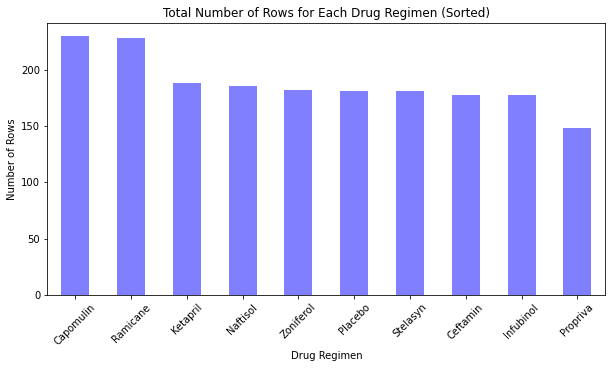

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar = clean_data.groupby('Drug Regimen').count()['Mouse ID']
# Sort the pandas_bar Series in descending order
pandas_bar_sorted = pandas_bar.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 5))
pandas_bar_sorted.plot(kind='bar', color='b', alpha=0.5, align="center")
plt.title("Total Number of Rows for Each Drug Regimen (Sorted)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
# Rotate x-axis labels 45 degrees
plt.xticks(rotation=45)
plt.show()

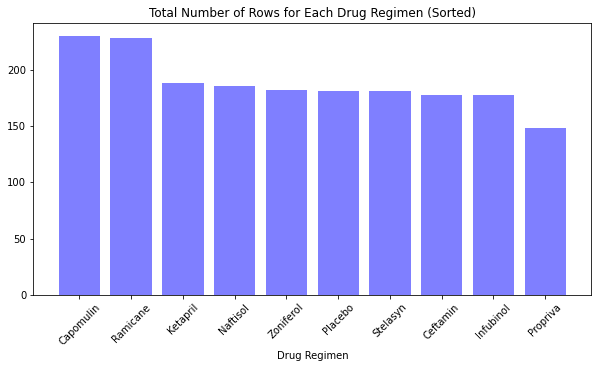

In [87]:
# Get the sorted x_labels and y_values
x_labels = pandas_bar_sorted.index
y_values = pandas_bar_sorted.values

# Set the size of the figure
plt.figure(figsize=(10, 5))

# Draw a bar chart by using pyplot
plt.bar(x_labels, y_values, color='b', alpha=0.5, align="center")

# Add title and labels
plt.title("Total Number of Rows for Each Drug Regimen (Sorted)")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)

plt.show()

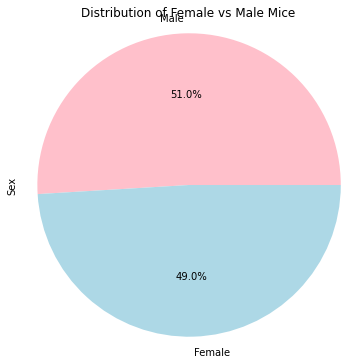

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_data['Sex'].value_counts()
colors = ['pink', 'lightblue']
plt.figure(figsize=(6, 6))

mice_pie = gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

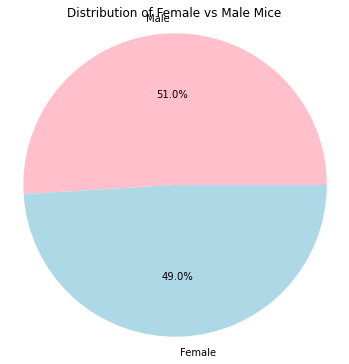

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_counts.index

# draw a pie chart by pyplot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint = greatest_timepoint.reset_index()
greatest_timepoint
merged_lastTP = greatest_timepoint.merge(clean_data, on=["Mouse ID", "Timepoint"], how="left")
merged_lastTP

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [88]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_lastTP.loc[merged_lastTP['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    
    # Check for potential outliers
    potential_outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print potential outliers
    print(f"{treatment}'s potential outliers: {potential_outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


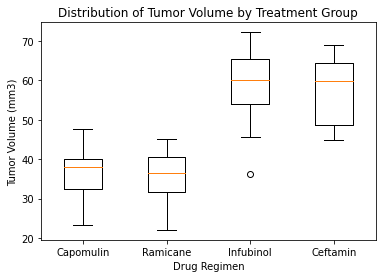

In [73]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title("Distribution of Tumor Volume by Treatment Group")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

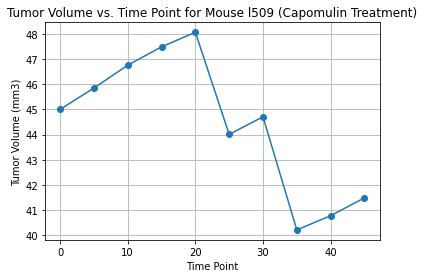

In [67]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter data for mice treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Choose a single mouse l509
selected_mouse = 'l509'
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse]

# Generate the line plot
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title(f"Tumor Volume vs. Time Point for Mouse {selected_mouse} (Capomulin Treatment)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()


In [70]:
capomulin_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


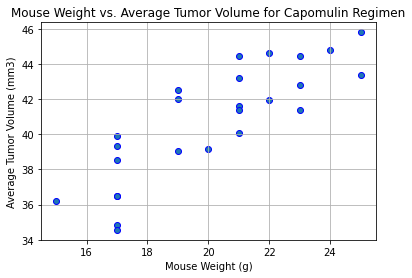

In [80]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume and weight for each mouse in Capomulin group
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Step 3: Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker='o', edgecolors='blue')
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

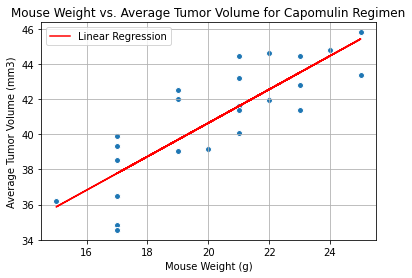

The correlation coefficient between mouse weight and average observed tumor volume for the entire Capomulin regimen is: 0.84
The linear regression model is: y = 0.95x + 21.55


In [89]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)

# Correlation coefficient
correlation_coefficient = r_value

# Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker='o', edgecolors='white')
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red', label='Linear Regression')
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.grid(True)
plt.show()

# Print the correlation coefficient
print(f"The correlation coefficient between mouse weight and average observed tumor volume for the entire Capomulin regimen is: {correlation_coefficient:.2f}")

# Print the linear regression model
print(f"The linear regression model is: y = {slope:.2f}x + {intercept:.2f}")